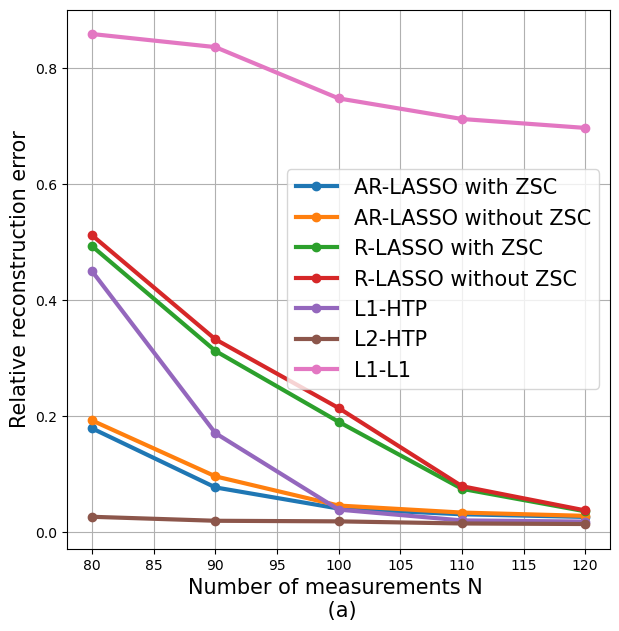

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tex
from utils import bound
np.set_printoptions(suppress = True, precision = 9)

candidates_N = [80, 90, 100, 110, 120]
data = np.array([np.mean(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 0), axis = 0) for N in candidates_N])

plt.figure(figsize = [7, 7])

plt.plot(candidates_N, data[:, 0], label = "AR-LASSO with ZSC", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 1], label = "AR-LASSO without ZSC", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 2], label = "R-LASSO with ZSC", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 3], label = "R-LASSO without ZSC", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 4], label = "L1-HTP", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 7], label = "L2-HTP", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 5], label = "L1-L1", marker = "o", linewidth = 3)

plt.legend(fontsize = 15)
plt.xlabel("Number of measurements N \n (a)", fontsize = 15)
plt.ylabel("Relative reconstruction error", fontsize = 15)
plt.grid()
plt.savefig("Figure1a.pdf")

In [2]:
# data

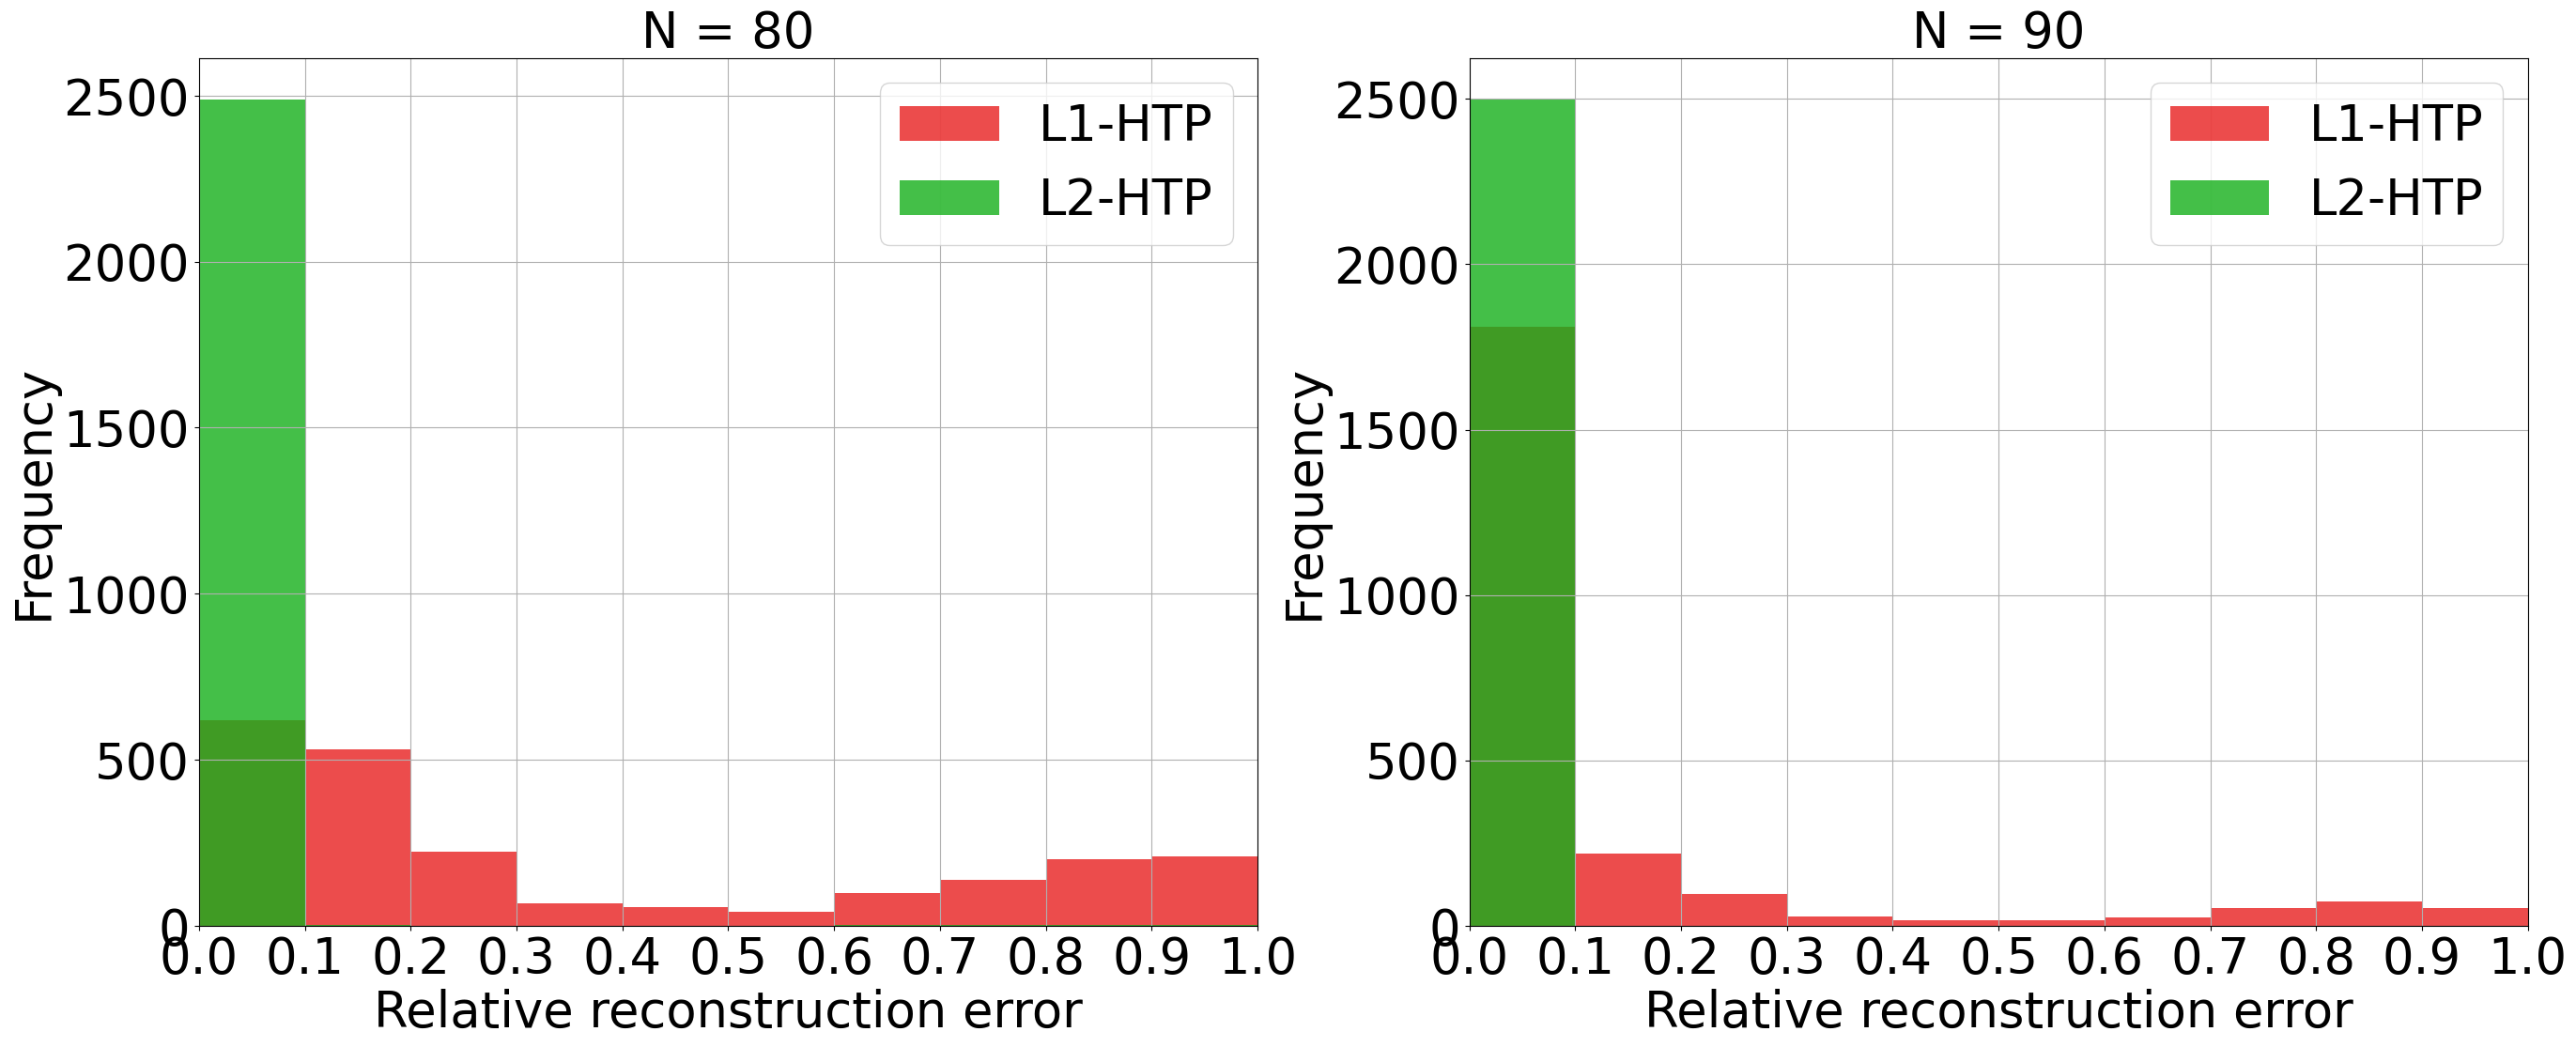

In [3]:
plt.figure(figsize = [32, 12])
t = 1
fontsize = 38

for N in [80, 90]:
    plt.subplot(1, 2, t)
    plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 4].reshape((-1)), label = "L1-HTP", alpha = 0.7, color = 'xkcd:red', bins = np.arange(0, 1.2, 0.1))
    plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 7].reshape((-1)), label = "L2-HTP", alpha = 0.8, color = 'xkcd:green', bins = np.arange(0, 1.2, 0.1))

    plt.title("N = {}".format(N), fontsize = fontsize)
    plt.xlim([0, 1])
    plt.yticks(fontsize = fontsize)
    plt.xticks(np.arange(0, 1.1, 0.1), fontsize = fontsize)
    plt.legend(fontsize = fontsize)
    plt.grid()
    plt.ylabel("Frequency", fontsize = fontsize)
    plt.xlabel("Relative reconstruction error", fontsize = fontsize)
    t += 1

plt.savefig("Figure2.pdf")

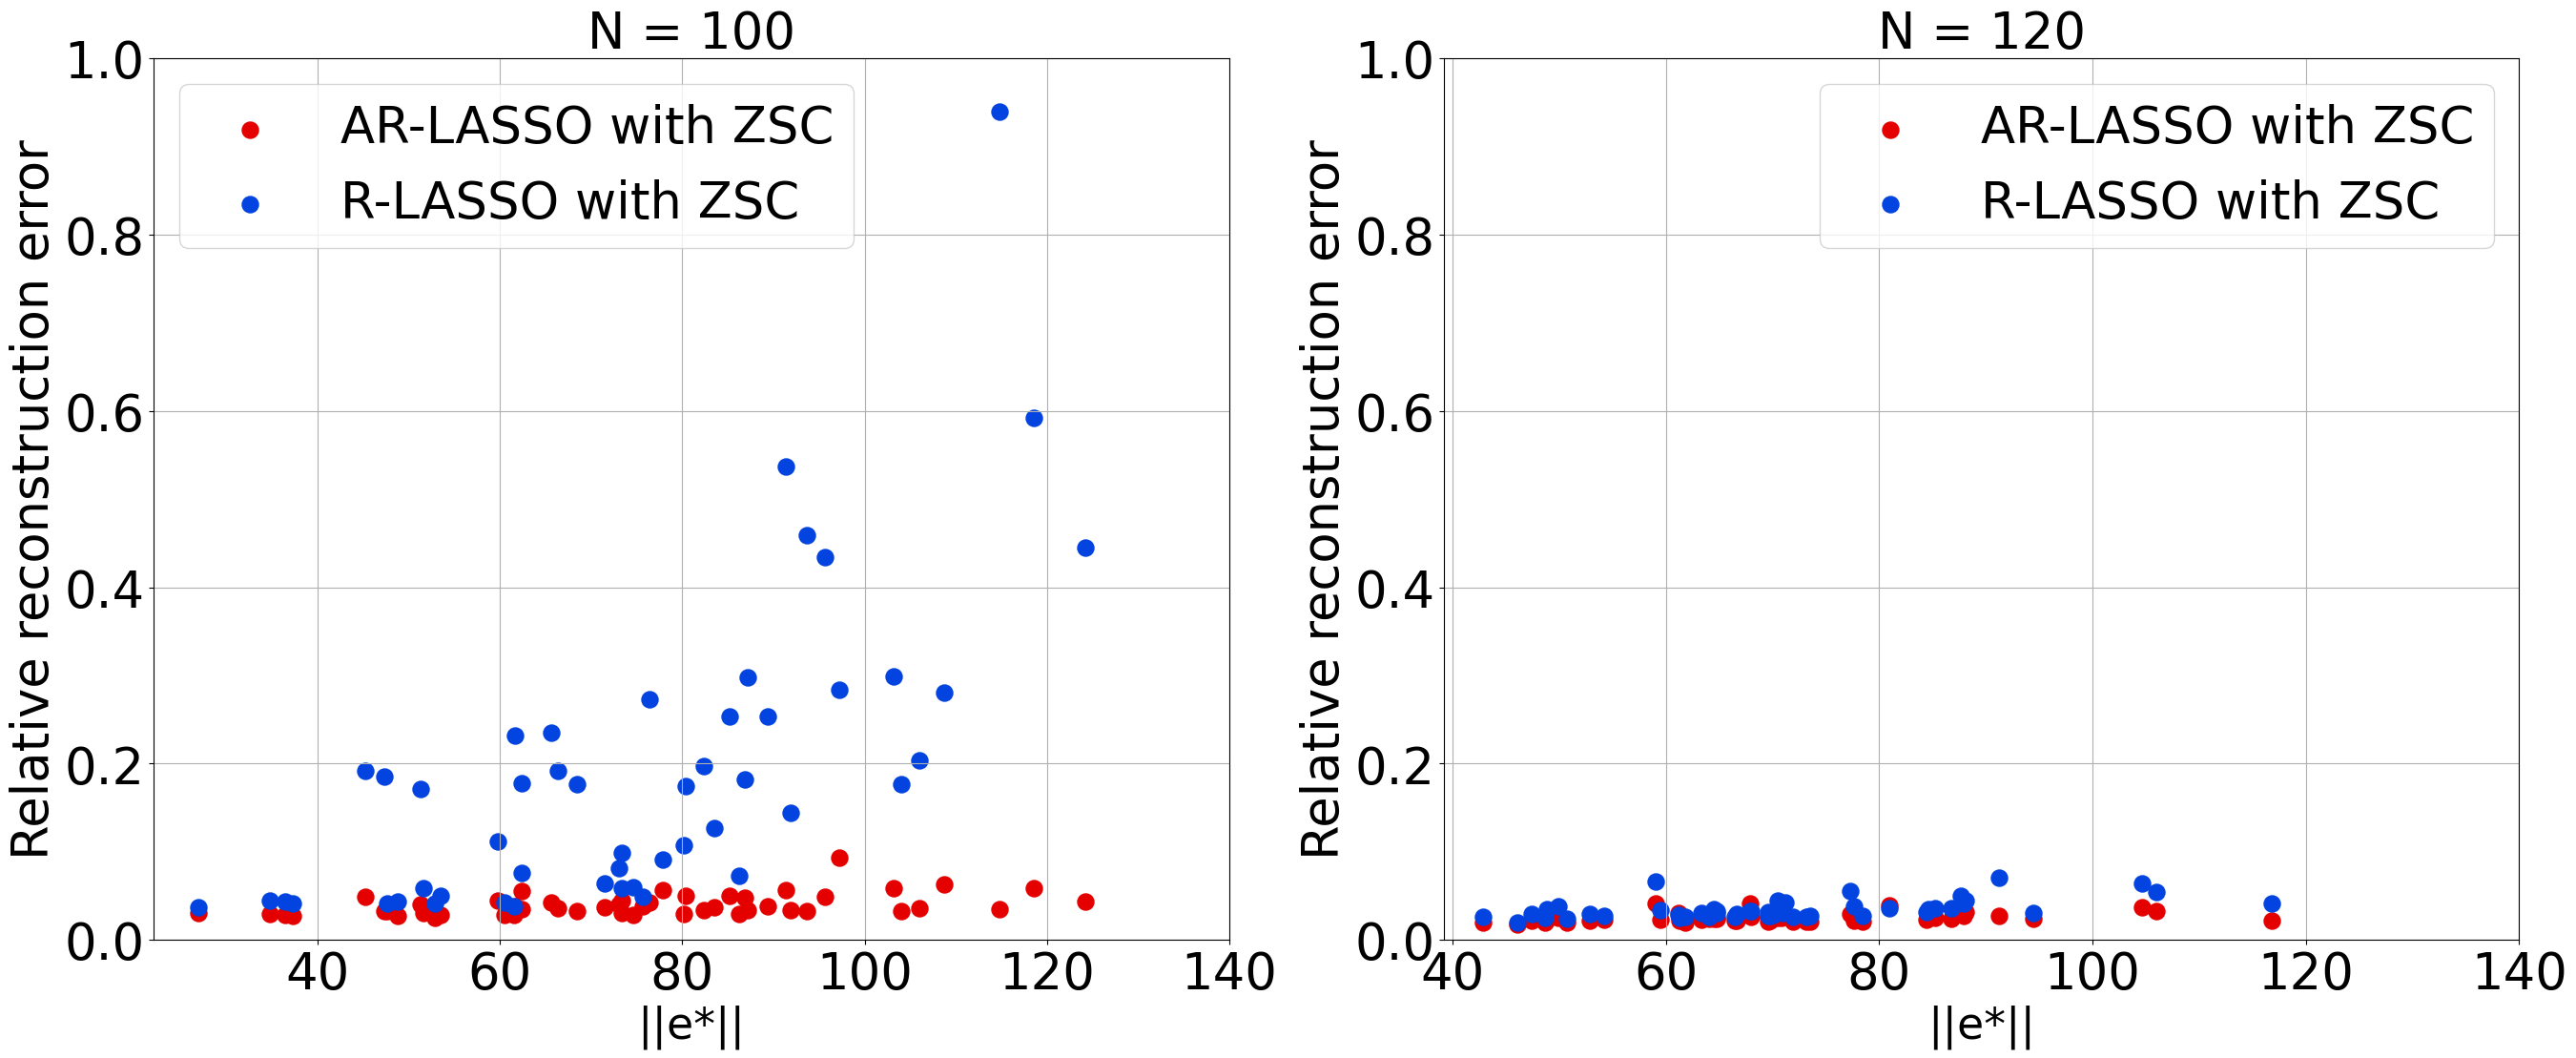

In [4]:
plt.figure(figsize = [32, 12])
t = 1
fontsize = 38
for N in [100, 120]:

    plt.subplot(1, 2, t)
    plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 0].reshape((-1)), label = "AR-LASSO with ZSC", color = 'xkcd:red', s = 150)
    plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 2].reshape((-1)), label = "R-LASSO with ZSC", color = 'xkcd:blue', s = 150)
    plt.xlabel("||e*||", fontsize = fontsize - 5)
    plt.ylabel("Relative reconstruction error", fontsize = fontsize)
    plt.title("N = {}".format(N), fontsize = fontsize)
    plt.grid()
    plt.ylim(0, 1)
    plt.xticks([40, 60, 80, 100, 120, 140])
    plt.yticks(fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.legend(fontsize = fontsize)

    t += 1

plt.savefig("Figure3.pdf")